# BP storing full probabilities instead of just one parameter

In [51]:
using OffsetArrays, Statistics
include("../code/bp_full.jl")

update_factor_ms! (generic function with 3 methods)

In [35]:
m = factorial(4)*11
R = 0.8/3
r = 1 - 3R
n = round(Int, 3m/(2+r))
Λ = OffsetVector([0,0,1-r,r], 0:3)
K = OffsetVector([0,0,0,1], 0:3)
nedges = 3m
H = 1
s = rand((-1,1), n)
efield = [(exp(ss*H),exp(-ss*H)) for ss in s]
bp = bp_full(n, m, nedges, Λ, K, efield)
B, indep = findbasis_slow(Array(bp.H))

(Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 1 0; 0 0 … 0 1], [135, 180, 212, 218, 219, 229, 231, 234, 238, 242  …  351, 352, 353, 354, 355, 356, 357, 358, 359, 360])

In [36]:
nunsat, ovl, dist = decimate!(bp, efield, indep, s, maxiter=10^3, Tmax=1, tol=1e-4, 
    callback=cb_decimation, fair_decimation=true, update_v! = update_var_bp!, update_f! = update_factor_bp!) 
#     callback=cb_decimation, fair_decimation=true) 

ε = 9.043528812446855e-5
Avg distortion after 1st BP round: 0.23570611558671045
 Step    0. Free =  96. Maxfield = -Inf. ε = 9.04E-05. Unsat =  13. Ovl = 0.628. Iters 101
 Step    1. Free =  95. Maxfield = 1.00E+00. ε = 5.34E-05. Unsat =  13. Ovl = 0.628. Iters 7
 Step    2. Free =  94. Maxfield = 9.99E-01. ε = 9.16E-05. Unsat =  13. Ovl = 0.628. Iters 12
 Step    3. Free =  93. Maxfield = 9.98E-01. ε = 6.69E-05. Unsat =  13. Ovl = 0.628. Iters 17
 Step    4. Free =  92. Maxfield = 9.97E-01. ε = 9.69E-05. Unsat =  13. Ovl = 0.628. Iters 31
 Step    5. Free =  91. Maxfield = 9.95E-01. ε = 9.59E-05. Unsat =  13. Ovl = 0.628. Iters 34
 Step    6. Free =  90. Maxfield = 9.96E-01. ε = 9.98E-05. Unsat =  13. Ovl = 0.628. Iters 29
 Step    7. Free =  89. Maxfield = 9.96E-01. ε = 8.77E-05. Unsat =  13. Ovl = 0.628. Iters 19
 Step    8. Free =  88. Maxfield = 9.93E-01. ε = 9.98E-05. Unsat =  13. Ovl = 0.628. Iters 34
 Step    9. Free =  87. Maxfield = 9.91E-01. ε = 9.31E-05. Unsat =  13. Ovl = 

 Step   88. Free =   8. Maxfield = 1.00E+00. ε = 9.23E-01. Unsat =  12. Ovl = 0.489. Iters 1000
 Step   89. Free =   7. Maxfield = 1.00E+00. ε = 9.24E-01. Unsat =  12. Ovl = 0.489. Iters 1000
 Step   90. Free =   6. Maxfield = 1.00E+00. ε = 9.24E-01. Unsat =  12. Ovl = 0.489. Iters 1000
 Step   91. Free =   5. Maxfield = 1.00E+00. ε = 9.24E-01. Unsat =  12. Ovl = 0.489. Iters 1000
 Step   92. Free =   4. Maxfield = 1.00E+00. ε = 9.24E-01. Unsat =  12. Ovl = 0.489. Iters 1000
 Step   93. Free =   3. Maxfield = 9.92E-01. ε = 5.41E-01. Unsat =  11. Ovl = 0.528. Iters 1000
 Step   94. Free =   2. Maxfield = 1.00E+00. ε = 5.42E-01. Unsat =   9. Ovl = 0.522. Iters 1000
 Step   95. Free =   1. Maxfield = 6.70E-01. ε = 5.58E-05. Unsat =   0. Ovl = 0.517. Iters 29
Trial 1 of 1: 0 unsat. Dist = 0.242


(0, 0.5166666666666666, 0.24166666666666667)

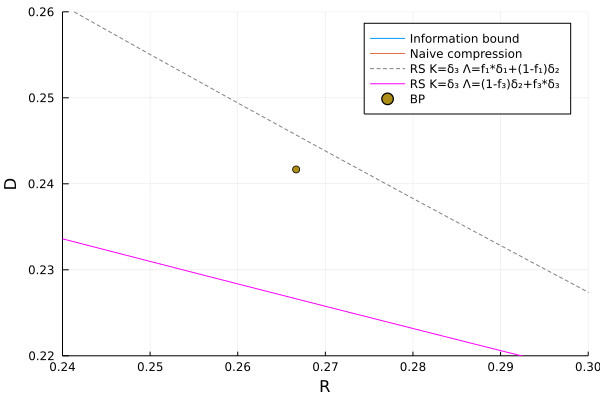

In [37]:
pl = plot_rdb()
scatter!([R], [dist], label="BP")
xlims!((0.24,0.30)); ylims!((0.22,0.26))

## Average over more than one instance

In [18]:
m = factorial(5)*11*4
R = 0.8/3
r = 1 - 3R
n = round(Int, 3m/(2+r))
Λ = OffsetVector([0,0,1-r,r], 0:3)
K = OffsetVector([0,0,0,1], 0:3)
nedges = 3m
Hs = [1]
navg = 10
dist_f3 = [Float64[] for _ in eachindex(Hs)]
for j in 1:navg
    println("#### Round $j of $navg")
    bp = bp_full(n, m, nedges, Λ, K)
    B, freevars = findbasis_slow(Array(bp.H))
    s = rand((-1,1), n)
    for (i,H) in enumerate(Hs)
        println("------ H=", round(H,digits=4), ". ", i, " of ", length(Hs), " ------")
        efield = [(exp(ss*H),exp(-ss*H)) for ss in s]
        _,_,d = decimate!(bp, efield, freevars, s, maxiter=1000, Tmax=1, tol=1e-4)  
        isnan(d) || push!(dist_f3[i], d) 
    end
end

#### Round 1 of 10


Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


------ H=1.0. 1 of 1 ------


LoadError: InterruptException:

In [ ]:
println("Avg over $navg instances")
colors = cgrad(:heat, length(Hs)+1, categorical = true)
pl_f3 = plot_rdb()
for (i,H) in enumerate(Hs)
    scatter!(pl_f3, [R], [mean(dist_f3[i])], 
        yerr = [std(dist_f3[i])/sqrt(length(dist_f3[i]))],
        label="BP - f_3=$(round(r,digits=1)) - H=$(round(H,sigdigits=2))", mc=colors[i], ms=4)
end
plot(pl_f3, size=(600,400), legend=:topright)
xlims!((0.24,0.30)); ylims!((0.22,0.26))

# With reinforcement

In [60]:
m = factorial(6)*11
R = 0.8/3
r = 1 - 3R
n = round(Int, 3m/(2+r))
Λ = OffsetVector([0,0,1-r,r], 0:3)
K = OffsetVector([0,0,0,1], 0:3)
nedges = 3m
H = 0.75
s = rand((-1,1), n)
efield = [(exp(ss*H),exp(-ss*H)) for ss in s]
bp = bp_full(n, m, nedges, Λ, K, efield)
B, freevars = findbasis_slow(Array(bp.H));

Progress: 100%|█████████████████████████████████████████| Time: 0:00:14


In [61]:
maxiter = 5*10^4
cb(it, ε, bp) = (mod(it,10^3)==0 && println("Iter $it finished"); false)
ε, iters = iteration!(bp; maxiter=maxiter, tol=1e-12, damp=0.5, rein=5/maxiter, callback=cb)

Iter 1000 finished
Iter 2000 finished
Iter 3000 finished
Iter 4000 finished
Iter 5000 finished
Iter 6000 finished
Iter 7000 finished
Iter 8000 finished
Iter 9000 finished
Iter 10000 finished
Iter 11000 finished
Iter 12000 finished
Iter 13000 finished
Iter 14000 finished
Iter 15000 finished
Iter 16000 finished
Iter 17000 finished
Iter 18000 finished
Iter 19000 finished
Iter 20000 finished
Iter 21000 finished
Iter 22000 finished
Iter 23000 finished
Iter 24000 finished
Iter 25000 finished
Iter 26000 finished
Iter 27000 finished
Iter 28000 finished
Iter 29000 finished
Iter 30000 finished
Iter 31000 finished
Iter 32000 finished
Iter 33000 finished
Iter 34000 finished
Iter 35000 finished
Iter 36000 finished
Iter 37000 finished
Iter 38000 finished
Iter 39000 finished
Iter 40000 finished
Iter 41000 finished
Iter 42000 finished
Iter 43000 finished
Iter 44000 finished
Iter 45000 finished
Iter 46000 finished
Iter 47000 finished
Iter 48000 finished
Iter 49000 finished
Iter 50000 finished


(2.792952132685267e-5, 50000)

In [62]:
performance(bp,s)

(1, 0.5357407407407407, 0.23212962962962963)

In [63]:
x = argmax.(bp.belief) .== 2
σ = fix_indep!(x, B, freevars)
dd = distortion(σ, s)

0.24314814814814814

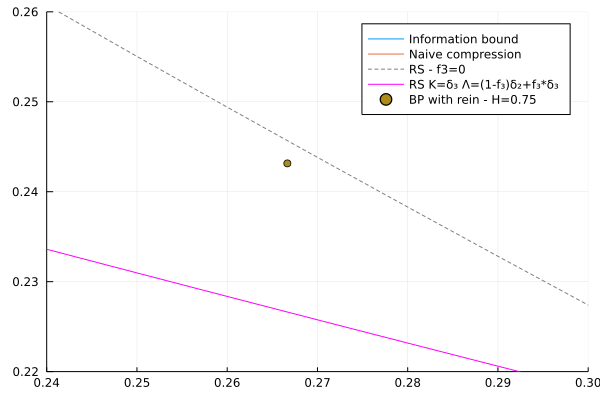

In [64]:
pl_r = plot_rdb()
scatter!(pl_r, [R], [dd], label="BP with rein - H=$(round(H,sigdigits=2))", ms=4)
plot(pl_r, size=(600,400), legend=:topright)
xlims!((0.24,0.30)); ylims!((0.22,0.26))

## Try with Max-Sum

In [38]:
f1 = 1/100
f2 = 0.8
f3 = 1 - f1 -f2
Lambda = [f1,f2,f3]
K = [0,0,1]
n = 3000
nedges = Int(round(n*sum(i*l for (i,l) in pairs(Lambda)), digits=10))
m = Int(nedges/3)

2180

In [71]:
H = 1.4
s = rand((-1,1), n)
efield = [(exp(ss*H),exp(-ss*H)) for ss in s]
A = sparse(ldpc_matrix(n, m, nedges, Lambda, K)')
ms = BPFull(A, efield)
# find basis with leaf removal
B, indep = findbasis(ms.H)
R_ms = size(B,2)/n

0.2733333333333333

In [72]:
# iteration!(ms, update_factor! = update_factor_ms!, update_var! = update_var_ms!, maxiter=10^3, 
#     damp=0.5, rein=1e-3)
iteration!(ms, maxiter=10^3, damp=0.5, rein=1e-3)
nunsat_ms, ovl_ms, dist_ms = performance(ms,s)

(1, 0.5466666666666666, 0.22666666666666666)

In [73]:
x = argmax.(ms.belief).==2
distortion(s, fix_indep!(x,B,indep))

0.22766666666666666

In [74]:
sum(ms.belief .== ((0.5,0.5),))

0

In [ ]:
include("../code/rs.jl")
F1 = 0:0.005:0.2
R_RS = zeros(length(F1))
D_RS = zeros(length(F1))
for i in eachindex(F1)
    Λ = [F1[i], 0.8, 0.2-F1[i]]
    R_RS[i], D_RS[i], _ = RS(K, Λ, N=100, tol=1e-6, maxiter=100)
end

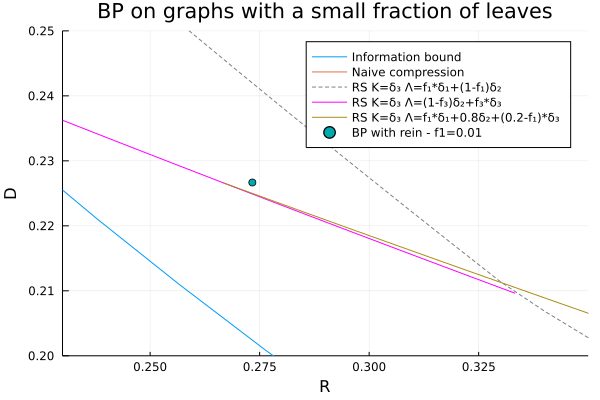

In [78]:
pl_ms = plot_rdb()
plot!(pl_ms, R_RS, D_RS, label="RS K=δ₃ Λ=f₁*δ₁+0.8δ₂+(0.2-f₁)*δ₃")
scatter!(pl_ms, [R_ms], [dist_ms], label="BP with rein - f1=$f1", ms=4)
plot(pl_ms, size=(600,400), legend=:topright)
xlims!((0.23,0.35)); ylims!((0.2,0.25))
title!("BP on graphs with a small fraction of leaves")

In [ ]:
f3 = 0:0.01:0.4
D = zero(f3)
R = zero(f3)
@showprogress for i in eachindex(D)
    Λ = [0,1-f3[i],f3[i]]
    @show Λ
#     R[i], D[i] , p = RS([0,0,1], Λ, N=500, tol=1e-6, maxiter=200)
end

In [325]:
i = 21
Λ = [0,1-f3[i],f3[i]]
RS([0,0,1], Λ, N=300, tol=1e-5, maxiter=100)

(0.2666666666666666, 0.21425573166477585, [1.5063132044451507e-7, 5.6387524630032856e-8, 5.380821093312203e-8, 5.417880905884143e-8, 5.4618779955471945e-8, 5.506667461000824e-8, 5.5521599541667426e-8, 5.598361863538798e-8, 5.645280946483648e-8, 5.692925359618384e-8  …  5.692925359618384e-8, 5.645280946483648e-8, 5.598361863538798e-8, 5.5521599541667426e-8, 5.506667461000824e-8, 5.4618779955471945e-8, 5.417880905884143e-8, 5.380821093312203e-8, 5.6387524630032856e-8, 1.5063132044451507e-7])

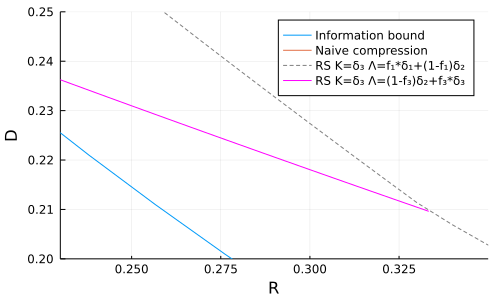

In [318]:
pp = plot_rdb(f3=false)
plot!(R, D, label="RS K=δ₃ Λ=(1-f₃)δ₂+f₃*δ₃", color=:magenta, size=(500,300))
xlims!((0.23,0.35)); ylims!((0.2,0.25))